# 12/8ゼミ

**提案手法**  
**Phase 1**  
区間重要度の中心を各手法で推定  
* $k$ 番目を除いた $n-1$ 個の $w_i$ に対して EV, GM, ALD で $w_{i}^{C}(k)$ を求める（この時点でそれらの総和は１となる）
* 上記で求めた $w_{i}^{C}(k)$ の和を $\mu_k$ 倍することで、 $k$ 番目の区間重要度中心は $1-\mu_k$ となる

**Phase 2**  
各 $k$ に対して、以下の線形最適化問題を解き、最適値を $d_{\overline{k}}^{*}$ とする：  
$$
\begin{align*}
\operatorname{minimize} ~~ & ~~
d_{\overline{k}} = \sum_{j \neq k} l_j, \\
\text{subject to} ~~ & ~~
a_{ij} \left( \mu w_{j}^{C} - l_j \right) \leq \mu w_{i}^{C} + l_i, &&
i \neq j, k, ~~ & j \neq k \\ & ~~
a_{kj} \left( \mu w_{j}^{C} - l_j \right) \leq 1-\mu + l_k, &&
j \neq k \\ & ~~
a_{ik} \{ \left(1- \mu \right) - l_k \} \leq \mu w_{i}^{C} + l_i, &&
i \neq k \\ & ~~
\left( 1 - \mu \right) + l_k + \sum_{i \neq j, k} \left( \mu w_{i}^{C} + l_i \right) + \mu w_{j}^{C} - l_j \geq 1, &&
i \in N \backslash k \\ & ~~
\left( 1 - \mu \right) - l_k + \sum_{i \neq j, k} \left( \mu w_{i}^{C} - l_i \right) + \mu w_{j}^{C} + l_j \leq 1, &&
i \in N \backslash k \\ & ~~
\mu w_{i}^{C} - l_i \geq \epsilon, &&
i \in N, ~~ & i \neq k \\ & ~~

\left( 1 - \mu \right) - l_k \geq \epsilon \\ & ~~
\sum_{i \neq k} \left( \mu w_{i}^{C} + l_i \right) + \left( 1 - \mu \right) - l_k \geq 1 \\ & ~~
\sum_{i \neq k} \left( \mu w_{i}^{C} - l_i \right) + \left( 1 - \mu \right) + l_k \leq 1 \\ & ~~


\end{align*}
$$

**Phase 3**  
各 $k$ に対して、以下の線形最適化問題を解き、最適値を $l_{k}^{*}$ とする：  
$$
\begin{align*}
\operatorname{minimize} ~~ & ~~
l_k, \\
\text{subject to} ~~ & ~~
a_{ij} \left( \mu w_{j}^{C} - l_j \right) \leq \mu w_{i}^{C} + l_i, &&
i \neq j, k, ~~ & j \neq k \\ & ~~
a_{kj} \left( \mu w_{j}^{C} - l_j \right) \leq 1-\mu + l_k, &&
j \neq k \\ & ~~
a_{ik} \{ \left(1- \mu \right) - l_k \} \leq \mu w_{i}^{C} + l_i, &&
i \neq k \\ & ~~
\left( 1 - \mu \right) + l_k + \sum_{i \neq j, k} \left( \mu w_{i}^{C} + l_i \right) + \mu w_{j}^{C} - l_j \geq 1, &&
i \in N \backslash k \\ & ~~
\left( 1 - \mu \right) - l_k + \sum_{i \neq j, k} \left( \mu w_{i}^{C} - l_i \right) + \mu w_{j}^{C} + l_j \leq 1, &&
i \in N \backslash k \\ & ~~
\mu w_{i}^{C} - l_i \geq \epsilon, &&
i \in N, ~~ & i \neq k \\ & ~~

\left( 1 - \mu \right) - l_k \geq \epsilon \\ & ~~
\sum_{i \neq k} \left( \mu w_{i}^{C} + l_i \right) + \left( 1 - \mu \right) - l_k \geq 1 \\ & ~~
\sum_{i \neq k} \left( \mu w_{i}^{C} - l_i \right) + \left( 1 - \mu \right) + l_k \leq 1 \\ & ~~
\sum_{j \neq k} l_j = d_{\overline{k}}^{*}\\ & ~~


\end{align*}
$$

**Phase 4**  
Phase 3 で導かれた結果は各$k$に対して存在するから、以下のようにして結果を統合する：  
* 各$l_{k}^{*}$に対して、  
$$\left\{\begin{array}{l}w_i(k)=\left[\mu_{k}^* w_i^c-l_{i}^{*},\:\: \mu_{k}^* w_i^c+l_{i}^{*}\right], \quad i \neq k \\ w_i(k)=\left[\left(1-\mu_{k}^*\right)-l_{i}^{*},\:\:\left(1-\mu_{k}^*\right)+l_{i}^{*}\right], \quad i=k\end{array}\right.$$
  

$$\overline{w}_i^L=\min _{k \in N} w_i^L(k) \quad \overline{w}_i^U=\max _{k \in N} w_i^U(k)$$  
  
ここで、$\overline{w}_i^L$ と $\overline{w}_i^U$ の中心 $\overline{w}_i^C$の総和が1となるように正規化する：
  
$$\overline{\overline{w}}_i^L=\frac{\overline{w}_i^L}{\sum_{i \in N} \frac{\overline{w}_i^L+\overline{w}_i^U}{2}} \quad \overline{\overline{w}}_i^U=\frac{\overline{w}_i^U}{\sum_{i \in N} \frac{\overline{w}_i^L+\overline{w}_i^U}{2}}$$

In [6]:
using LaTeXStrings
# using IntervalSets
using Plots

include("./libs/display-latex.jl")
include("./libs/crisp-pcm.jl")
include("./libs/solve-deterministic-ahp.jl")
include("./libs/MMR3.jl")
include("./libs/MMR-W3.jl")

MMR_W (generic function with 1 method)

In [7]:
# 完全整合
# A = [
#     1 1 1 1
#     1 1 1 1
#     1 1 1 1
#     1 1 1 1.0
# ]
# A = [
#     1   3   5   7
#     1/3 1   5/3 7/3
#     1/5 3/5 1   7/5
#     1/7 3/7 5/7 1
# ]
# A = [
#     1 1 1/3
#     1 1 1/3
#     3 3 1
# ]

# CI = 0.01
# A = [
#     1 2 4/3 4/3
#     1/2 1 1 1
#     3/4 1 1 3/2
#     3/4 1 2/3 1.0
# ]
# A = [
#     1 1 2/3 1
#     1 1 4/9 2/3
#     3/2 9/4 1 1
#     1 3/2 1 1.0
# ]

# CI = 0.15
# A = [
#     1 1 2 2
#     1 1 3 1
#     1/2 1/3 1 3
#     1/2 1 1/3 1
# ]

# エラーケース EVでダメなやつ
# A = [
#     1.0  1.0  2.0  3.0  3.0
#     1.0  1.0  2.0  3.0  5.0
#     1/2  1/2  1.0  1.0  3.0
#     1/3  1/3  1.0  1.0  2.0
#     1/3  1/5  1/3  1/2  1.0
# ]

# エラーケース GMでダメなやつ
# A = [
#     1.0  1.0  2.0  3.0  8.0
#     1.0  1.0  2.0  2.0  3.0
#     1/2  1/2  1.0  2.0  6.0
#     1/3  1/2  1/2  1.0  5.0
#     1/8  1/3  1/6  1/5  1.0
# ]

# エラーケース ADでダメなやつ
# A = [
#     1.0  2.0   2.0   3.0   2.0
#     1/2  1.0   1.0   2.0   4.0
#     1/2  1.0   1.0   1.0   4.0
#     1/3  1/2   1.0   1.0   4.0
#     1/2  1/4  1/4  1/4  1.0
# ]

# エラーケース ADでダメなやつ
# 分数表記はOK
# A = [
#     1.0 1.0 2.0 3.0 6.0
#     1.0 1.0 2.0 2.0 6.0
#     1/2 1/2 1.0 1.0 5.0
#     1/3 1/2 1.0 1.0 1.0
#     1/6 1/6 1/5 1.0 1.0
# ]

# 実数表記はNG
# A = [
#     1.000000 1.000000 2.000000 3.000000 6.000000
#     1.000000 1.000000 2.000000 2.000000 6.000000
#     0.500000 0.500000 1.000000 1.000000 5.000000
#     0.333333 0.500000 1.000000 1.000000 1.000000
#     0.166667 0.166667 0.200000 1.000000 1.000000
# ]

A = [
    1.000000 1.000000 1.000000 1.000000 3.000000 3.000000
    1.000000 1.000000 1.000000 1.000000 3.000000 4.000000
    1.000000 1.000000 1.000000 2.000000 1.000000 4.000000
    1.000000 1.000000 0.500000 1.000000 2.000000 2.000000
    0.333333 0.333333 1.000000 0.500000 1.000000 1.000000
    0.333333 0.250000 0.250000 0.500000 1.000000 1.000000
]

display(L"A = %$(matrixLaTeXString(A))")

L"$A = \begin{pmatrix} 1.0 & 1.0 & 1.0 & 1.0 & 3.0 & 3.0 \\1.0 & 1.0 & 1.0 & 1.0 & 3.0 & 4.0 \\1.0 & 1.0 & 1.0 & 2.0 & 1.0 & 4.0 \\1.0 & 1.0 & 0.5 & 1.0 & 2.0 & 2.0 \\0.333 & 0.333 & 1.0 & 0.5 & 1.0 & 1.0 \\0.333 & 0.25 & 0.25 & 0.5 & 1.0 & 1.0 \\ \end{pmatrix}$"

In [8]:
solution1 = MMR(A, EV)
s1 = solution1.s
centers1 = solution1.centers
l1 = solution1.l
W1 = solution1.W
display(L"MMR_E = %$(intervalVectorLaTeXString(W1))")


L"$MMR_E = \begin{pmatrix} \left[ 0.115, 0.348 \right] \\ \left[ 0.115, 0.348 \right] \\ \left[ 0.064, 0.199 \right] \\ \left[ 0.07, 0.25 \right] \\ \left[ 0.045, 0.186 \right] \\ \left[ 0.035, 0.224 \right] \end{pmatrix}$"

In [9]:
solution2 = MMR_W(A, EV)
W2 = solution2.W
centers2 = solution2.centers
l2 = solution2.l
display(L"E-MMR_W = %$(intervalVectorLaTeXString(W2))")

L"$E-MMR_W = \begin{pmatrix} \left[ 0.19, 0.239 \right] \\ \left[ 0.171, 0.28 \right] \\ \left[ 0.124, 0.317 \right] \\ \left[ 0.124, 0.215 \right] \\ \left[ 0.005, 0.194 \right] \\ \left[ 0.059, 0.081 \right] \end{pmatrix}$"

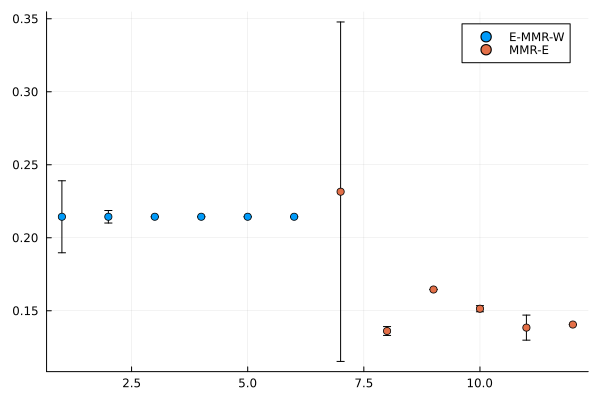

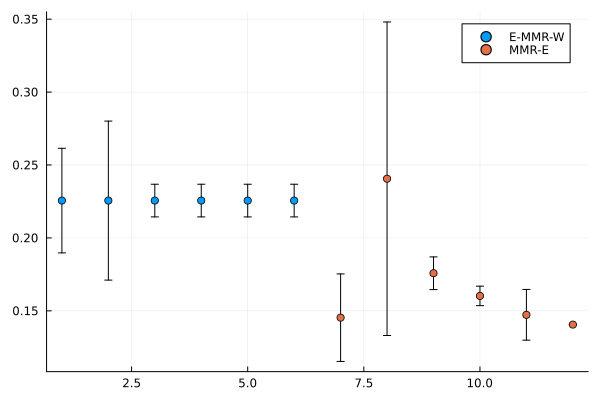

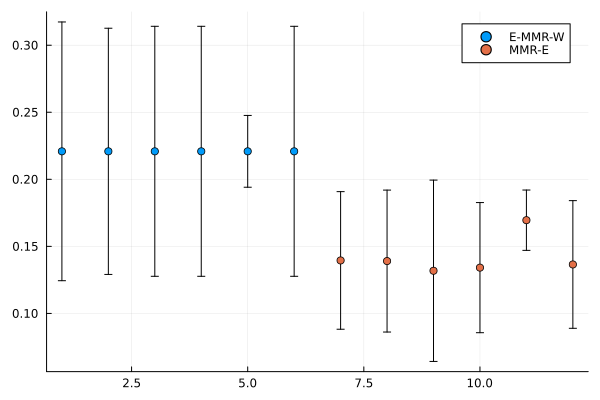

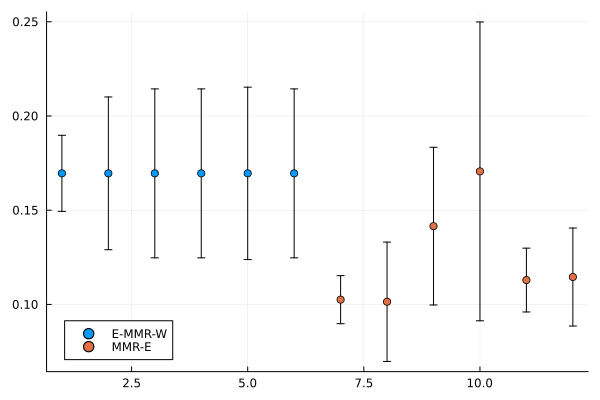

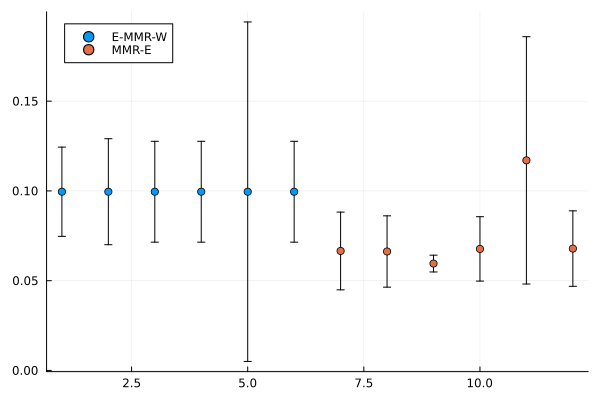

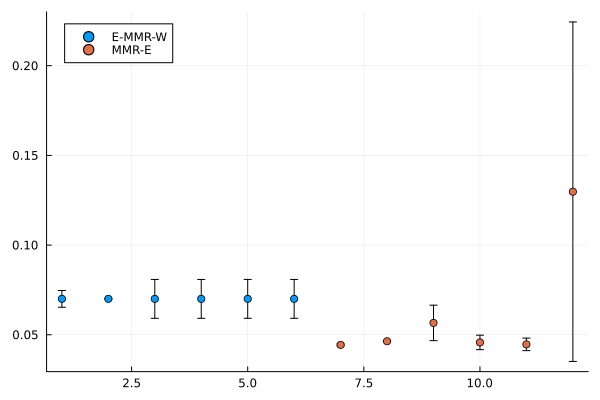

In [10]:

m, n = size(A)
# plot_obj = plot()

for i in 1:n
    plot_obj = plot()
    x = 1:n
    y = fill(centers2[i],n)
    e = l2[i, :]
    plot!(x, y, grid=true, yerror=e, st=:scatter, label = "E-MMR-W")
    x = n+1:n*2
    y = centers1[i, :]/s1
    e = l1[i, :]/s1
    plot!(x, y, grid=true, yerror=e, st=:scatter, label = "MMR-E")
    display(plot_obj)
end
